# Leave One out cross validation

In [4]:
import numpy as np
import pandas as pd
import csv
import os
np.random.seed(12345)
import seaborn as sbn
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV
from sklearn.model_selection import KFold
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [155]:
fulldata = pd.read_csv('/Users/rigel/Course Docs/Fall-2018/MachineLearning/project/dataset/OnlineNewsPopularity/OnlineNewsPopularity.csv') 
data = fulldata.sample(n=700, random_state = 0)
data.to_csv(path_or_buf ='/Users/rigel/Course Docs/Fall-2018/MachineLearning/project/dataset/OnlineNewsPopularity/OnlineNewsPopularitysample.csv' )
data = data.drop(['url',' timedelta'],axis = 1)
std_data = data.copy()
for column in data.columns:
        if column!=' shares':
            std_data[column] = preprocessing.scale(data[column])
def popular(s):
    return 1 if s>1400 else 0
std_data[' popularity'] = data[' shares'].apply(popular)
std_data = std_data.drop([' shares'],axis = 1)
std_data


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,popularity
18765,-1.199042,0.581328,-0.614118,0.152944,-0.384443,0.370925,0.881041,-0.445355,-0.323145,0.490668,...,0.081178,-0.674562,0.561720,-0.230753,0.600674,-0.865450,-0.206170,0.837337,-0.687403,0
16349,0.715050,-0.936268,1.118082,0.152944,0.730875,-0.343701,-0.320691,-0.445355,-0.323145,-0.023043,...,5.774612,0.958232,0.362059,0.112903,-0.377027,0.482317,0.051121,-1.457572,-0.381619,1
27703,0.715050,0.759999,-1.113405,0.152944,-1.366223,-0.423104,-0.080344,2.144327,0.181206,0.183736,...,0.081178,0.958232,1.234492,1.258421,0.600674,2.244781,-1.171009,0.837337,0.459289,1
32947,-0.720519,1.712908,-1.195032,0.152944,-1.036692,1.561967,1.842426,1.034463,-0.323145,-0.017417,...,-0.452582,0.141835,0.953757,0.112903,0.600674,-0.865450,-0.206170,0.837337,-0.687403,1
35434,-1.199042,-0.629661,0.477528,0.152944,0.296170,-0.264298,-0.080344,-0.075400,-0.323145,0.035748,...,-0.867728,0.958232,0.529167,0.800213,-0.132602,0.205852,-1.085246,-0.986821,0.357361,1
37965,0.715050,-0.294378,0.492365,0.152944,0.755730,-0.423104,-0.561037,-0.322037,-0.323145,0.211661,...,0.081178,0.958232,0.659380,0.800213,-0.132602,-0.865450,-0.206170,0.837337,-0.687403,0
21595,2.150620,4.622370,-1.150251,0.152944,-0.878478,0.370925,1.361734,5.720554,-0.323145,-0.079782,...,-0.867728,0.958232,-0.136410,-0.918063,0.600674,-0.865450,-0.206170,0.837337,-0.687403,1
29565,-0.241996,-0.642896,0.439569,0.152944,0.520338,-0.820118,-0.561037,-0.445355,-0.323145,0.822124,...,-0.452582,-1.082760,0.290441,0.685662,-0.132602,-0.865450,-0.206170,0.837337,-0.687403,0
19175,-0.720519,-0.510547,0.292502,0.152944,0.674526,-0.740715,-0.561037,-0.445355,0.181206,-0.291754,...,0.081178,0.958232,-0.295521,0.112903,0.967313,1.208037,1.080283,-0.927978,0.841520,1
29417,0.236527,-0.398051,0.239857,0.152944,0.344443,-0.423104,0.400348,-0.445355,-0.070969,0.064265,...,-0.867728,-0.266363,-0.347607,0.112903,-0.539978,-0.865450,-0.206170,0.837337,-0.687403,1


In [156]:
alphas = np.logspace(-5,5,100)
kFold=10
cpus = 2
#--- classifiers ---

def logistic_plain_cv(x_train, y_train, x_test):
    clf = LogisticRegressionCV(cv=kFold, 
                               max_iter=100000,
                               n_jobs=cpus)
    clf.fit(x_train, y_train)
    y_pred_test = [1 if p > 0.5 else 0 for p in clf.predict(x_test)]
    y_pred_train = [1 if p > 0.5 else 0 for p in clf.predict(x_train)]
    return clf, y_pred_train, y_pred_test

def random_forest(x_train, y_train, x_test):
    clf = RandomForestClassifier(n_estimators=100,
                                n_jobs=cpus)
    clf.fit(x_train, y_train)
    y_pred_test = [1 if p > 0.5 else 0 for p in clf.predict(x_test)]
    y_pred_train = [1 if p > 0.5 else 0 for p in clf.predict(x_train)]
    return clf, y_pred_train, y_pred_test

def lasso_cv(x_train, y_train, x_test):
    clf = LassoCV(alphas=alphas,
                  cv=kFold,
                  max_iter=100000)
    clf.fit(x_train, y_train)
    y_pred_test = [1 if p > 0.5 else 0 for p in clf.predict(x_test)]
    y_pred_train = [1 if p > 0.5 else 0 for p in clf.predict(x_train)]
    return clf, y_pred_train, y_pred_test

def elastic_net_cv(x_train, y_train, x_test):
    clf = ElasticNetCV(alphas=alphas,
                       cv=kFold,
                       max_iter=100000,
                       n_jobs=cpus)
    clf.fit(x_train, y_train)
    y_pred_test = [1 if p > 0.5 else 0 for p in clf.predict(x_test)]
    y_pred_train = [1 if p > 0.5 else 0 for p in clf.predict(x_train)]
    return clf, y_pred_train, y_pred_test

def ridge_cv(x_train, y_train, x_test):
    clf = RidgeCV(alphas=alphas,
                  cv=kFold)
    clf.fit(x_train, y_train)
    y_pred_test = [1 if p > 0.5 else 0 for p in clf.predict(x_test)]
    y_pred_train = [1 if p > 0.5 else 0 for p in clf.predict(x_train)]
    return clf, y_pred_train, y_pred_test

def svc(x_train, y_train, x_test):
    
    clf = GridSearchCV(SVC(),
                       parameter_space,
                       cv=kFold,
                       iid=True,
                       scoring='accuracy',
                       n_jobs=cpus)
    clf.fit(x_train, y_train)
    y_pred_test = [1 if p > 0.5 else 0 for p in clf.predict(x_test)]
    y_pred_train = [1 if p > 0.5 else 0 for p in clf.predict(x_train)]
    return clf, y_pred_train, y_pred_test

parameter_space = [
        {'kernel': ['rbf'],
         'gamma': np.logspace(-1,2,10),
         'C': np.logspace(-1,2,10)}
    ]
classifiers = {
    'lassocv': LassoCV(alphas = alphas, cv=kFold, max_iter = 100000, n_jobs=cpus),
    'elasticnetcv': ElasticNetCV(alphas = alphas, cv=kFold, max_iter = 100000, n_jobs=cpus),
    'ridgecv': RidgeCV(alphas = alphas,cv=kFold),
    'randomforest': RandomForestClassifier(n_estimators=100,n_jobs=cpus),
    'svm': GridSearchCV(SVC(), parameter_space, cv=kFold, iid=True, scoring='accuracy', n_jobs=cpus),
    'logisticcv': LogisticRegressionCV(cv=kFold, max_iter=100000, n_jobs=cpus)
}

def run_model(classifier):
    loo = LeaveOneOut()
    details = {'index': [],
          'optimal alpha': [],
          'error': []}
    for train_indices, test_indices in loo.split(std_data):
        train_features = std_data.values[:,:-1][train_indices]
        #print(train_features.shape)
        train_target = std_data.values[:,-1][train_indices]
        details['index'].append(train_target[0])
        #print(train_target.shape)
        test_features = std_data.values[:,:-1][test_indices]
        #print(test_features.shape)
        test_target = std_data.values[:,-1][test_indices]
        print(test_indices)
        #print(test_target.shape)
        clf = classifiers[classifier]
        clf.fit(train_features,train_target)
        details['error'].append(1.0 - accuracy_score(test_target, [1 if prob > 0.5 else 0 for prob in clf.predict(test_features)]))

    print (1.0*details['error'].count(1)/len(details['error']))
    
for c in classifiers:
    print("---" + c + "---")
    run_model(c)

---lassocv---
[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]
[82]
[83]
[84]
[85]
[86]
[87]
[88]
[89]
[90]
[91]
[92]
[93]
[94]
[95]
[96]
[97]
[98]
[99]
[100]
[101]
[102]
[103]
[104]
[105]
[106]
[107]
[108]
[109]
[110]
[111]
[112]
[113]
[114]
[115]
[116]
[117]
[118]
[119]
[120]
[121]
[122]
[123]
[124]
[125]
[126]
[127]
[128]
[129]
[130]
[131]
[132]
[133]
[134]
[135]
[136]
[137]
[138]
[139]
[140]
[141]
[142]
[143]
[144]
[145]
[146]
[147]
[148]
[149]
[150]
[151]
[152]
[153]
[154]
[155]
[156]
[157]
[158]
[159]
[160]
[161]
[162]
[163]
[164]
[165]
[166]
[167]
[168]
[169]
[170]
[171]
[172]
[173]
[174]
[175]
[176]
[177]
[178]
[179]
[180]
[181]
[182

In [5]:
# reading from the previous cell
results = { 
    'lassocv': 0.39571428571428574,                                                             
    'elasticnetcv': 0.3914285714285714,                                                              
    'ridgecv':  0.3842857142857143,                                                              
    'randomforest': 0.37,                                                                            
    'svm': 0.4228571428571429,                                                              
    'logisticcv': 0.42714285714285716
}

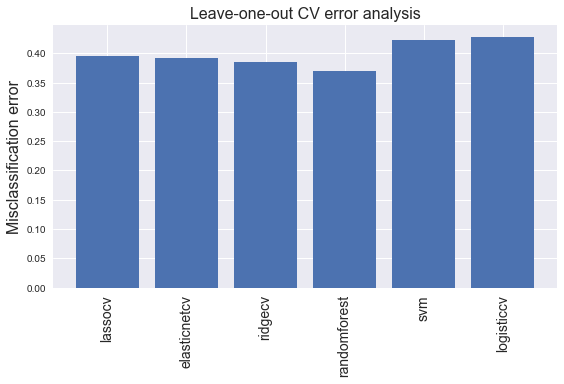

In [6]:
xlabels = list(results.keys())
plt.bar(range(len(xlabels)), list(results.values()),)
plt.ylabel('Misclassification error', fontsize=16)
plt.xticks(range(len(xlabels)), xlabels, rotation='vertical', fontsize= 14)
plt.title('Leave-one-out CV error analysis', fontsize= 16)
plt.tight_layout()

plt.savefig ("3e.png", dpi = 1200,pad_inches = 0)
plt.show()



[[ 1  2]
 [ 4  5]
 [ 7  8]
 [10 11]]
[ 3  6  9 12]
